In [591]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [592]:
df = pd.read_csv('The_Grades_Dataset.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [594]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [595]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [596]:
# print(f'General check for null values \n{df.isna().any()}\n')
print(f'Names of columns that contain null values: \n{df.columns[df.isna().any()].tolist()}\n')
print(f'Number of columns containing missing values: \n{len(df.columns[df.isna().any()].tolist())}\n')
print(f'Number of missing values in each column: \n{df.isna().sum()}')



# missingVal = df.columns[df.isna().any()]
# for i in missingVal:
#     print(f'{i}     {df[i].isna().sum()}')
    

Names of columns that contain null values: 
['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

Number of columns containing missing values: 
38

Number of missing values in each column: 
Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442      

In [597]:
df['CS-105'].value_counts()

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64

In [598]:
# Manually getting the courses of 1st year
first_year_h = df.iloc[:,:-31] 



target_h = df.CGPA
# print(target_h)   

# dropping seat number because it is not useful and doesn't have any affect on the grade
first_year_h.drop(['Seat No.'],axis=1,inplace=True)

first_year_h = pd.concat([first_year_h, df.CGPA], axis=1)


# dropping Rows having empty values 
first_year_h.dropna(inplace=True)

# Showing that there are no missing values in the dataset
print("Is there any Null values ? ",first_year_h.isna().any(axis=0))


target_h = first_year_h.CGPA 



# AGAIN DROPPING CGPA BECAUSE IT WILL CAUSE ERROR INENCODING
first_year_h.drop(['CGPA'],axis=1,inplace=True)

# we will get integers as well as floats in our dataframe if there are any empty values in the dataset 
# reason is that we are using ordinal encoding to encode our categorical variables
# here we are checking that in which columns we have null values and we are dropping them from our dataframe




Is there any Null values ?  PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
CGPA         False
dtype: bool


In [599]:
target_h

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 566, dtype: float64

In [600]:
first_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,B+
2,A,B,A,B-,B+,A,B-,B+,A-,A-,B-
3,D,C+,D+,D,D,A-,D+,C-,D,C+,D
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,C
...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,A+
567,A+,A,A,A,A,A,A,A-,A,A,A+
568,B,A,A-,B+,A,A,A,A,A,B,A+
569,A,B+,D,A,D,D+,B-,C-,B-,C-,A+


In [601]:
#establish the dictionary to use for ordinal encoding of categorical variables

# suppose 
# A + :  1 ,
# A   : 2 ,
# A-  : 3 ,
# B+  : 4 ,
# B   : 5 ,
# B-  : 6 ,
# C+  : 7 ,
# C   : 8 ,
# C-  : 9 ,
# D+  : 10 ,
# D   : 11 ,
# D-  : 12 ,
# F   : 13 ,
# P   : 14 ,
# W   : 15 ,
# WU  : 16 ,

#   , 2 ,  3 , 4  , 5 , 6  , 7  , 8 ,  9 , 10 , 11 , 12 , 13, 14 , 15 , 16 


# dicitonary_h = [{'col': 'CS-105', 'mapping':{'A+': 1, 'A': 2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8, 'C-': 9, 'D+': 10, 'D': 11, 'D-': 12, 'F': 13, 'P': 14, 'W': 15, 'WU': 16}}]

In [602]:
from sklearn.model_selection import train_test_split

In [603]:
# use ordinal encoding to encode our column 

import category_encoders as ce


In [604]:
dicitonary_h = []

# dictionary within list
# we are mapping grades to numbers 

for i in first_year_h:    
    dicitonary_h.append({'col': str(i), 'mapping':{'A+': 1, 'A': 2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8, 'C-': 9, 'D+': 10, 'D': 11, 'D-': 12, 'F': 13, 'P': 14, 'W': 15, 'WU': 16}})

#instantiate the encoder
for i in first_year_h:    
    column_names_h = str(i)
    encoder = ce.OrdinalEncoder(cols=[column_names_h], mapping=dicitonary_h)
    # print("encoder: ",encoder)
    # print(first_year_h.dtypes)
    # X_train_h , X_test_h  = train_test_split(first_year_h , random_state=42)
    first_year_grades_encoded = encoder.fit_transform(first_year_h)

    print(first_year_grades_encoded)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         6      10       9          8       9      10      11       9   
1         2      11      10         11       6       8      11       2   
2         2       5       2          6       4       2       6       4   
3        11       7      10         11      11       3      10       9   
4         3       3       3          4       2       2       3       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       5       2       2          3       1       2       3       3   
567       1       2       2          2       2       2       2       3   
568       5       2       3          4       2       2       2       2   
569       2       4      11          2      11      10       6       9   
570       8      11      11          8       8      10       5       7   

     EE-119  ME-107  CS-107  
0         6       9     9.0  
1        10      11     4.0  
2         3       3  

In [605]:
first_year_grades_encoded

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,6,10,9,8,9,10,11,9,6,9,9.0
1,2,11,10,11,6,8,11,2,10,11,4.0
2,2,5,2,6,4,2,6,4,3,3,6.0
3,11,7,10,11,11,3,10,9,11,7,11.0
4,3,3,3,4,2,2,3,4,2,3,8.0
...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2,3,1,2,3,3,1,4,1.0
567,1,2,2,2,2,2,2,3,2,2,1.0
568,5,2,3,4,2,2,2,2,2,5,1.0
569,2,4,11,2,11,10,6,9,6,9,1.0


In [606]:
first_year_grades_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566 entries, 0 to 570
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     566 non-null    int32  
 1   HS-101     566 non-null    int32  
 2   CY-105     566 non-null    int32  
 3   HS-105/12  566 non-null    int32  
 4   MT-111     566 non-null    int32  
 5   CS-105     566 non-null    int32  
 6   CS-106     566 non-null    int32  
 7   EL-102     566 non-null    int32  
 8   EE-119     566 non-null    int32  
 9   ME-107     566 non-null    int32  
 10  CS-107     566 non-null    float64
dtypes: float64(1), int32(10)
memory usage: 31.0 KB


In [607]:
first_year_grades_encoded['CS-107'] = first_year_grades_encoded['CS-107'].fillna(10).astype(int)

In [608]:
first_year_grades_encoded.shape

(566, 11)

In [609]:
target_h

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 566, dtype: float64

In [610]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import mglearn



In [611]:
X_train_h , X_test_h , y_train_h , y_test_h = train_test_split(first_year_grades_encoded , target_h , test_size=0.2 , random_state=0)

In [612]:
lr_h = LinearRegression()


In [613]:
lr_h.fit(X_train_h , y_train_h)

LinearRegression()

In [614]:
print("Training set score: {:.2f} %".format(lr_h.score(X_train_h , y_train_h)*100))
print("Testing set score: {:.2f} %".format(lr_h.score(X_test_h , y_test_h)*100))

Training set score: 84.08 %
Testing set score: 88.01 %


In [615]:
# plt.plot(reg2.predict(X_train_h), y_train_h, 'o', label='Training data')

In [616]:
# kNN Regression 

reg = KNeighborsRegressor()

X_train_h , X_test_h , y_train_h , y_test_h = train_test_split(first_year_grades_encoded , target_h , test_size=0.2 , random_state=42)

In [617]:
reg.fit(X_train_h , y_train_h)

KNeighborsRegressor()

In [618]:
print("Testing Data set score: {:.2f} %".format(reg.score(X_test_h , y_test_h)*100))
print("Training Data set score: {:.2f} %".format(reg.score(X_train_h , y_train_h)*100))

Testing Data set score: 81.89 %
Training Data set score: 87.73 %


In [619]:
# plt.plot(reg2.predict(X_train_h), y_train_h, 'o', label='Training data')

In [620]:
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################

In [621]:
# Second Model, We have to take both of the years data and combine them
 
first_second_year_h = df.iloc[:,:-20]

In [622]:
first_second_year_h

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,D,A-,B-,C+,D+,D+,D,A,D,C-
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,B-,C-,D+,D+,D,C,D,B-,C,D
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A,A,A,A,A+,A,A-,A,A-,A
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,B-,D,C,B+,C+,D,D+,D,D
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A,A-,A-,A-,B-,A,A-,A,A-,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A+,A,A,A,A,A+,A,A,B,A-
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,C+,A-,B,A,A,A+,A+,A,A,B
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B,B+,B,A-,A,B+,B,A,B+,B
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,D,B,B-,B,B-,C,B-,D+,D+


In [623]:
# DROPPING SEAT NUMBER BECAUSE IT IS NOT USEFUL
first_second_year_h.drop(['Seat No.'],axis=1,inplace=True)

In [624]:
first_second_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,D,A-,B-,C+,D+,D+,D,A,D,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,B-,C-,D+,D+,D,C,D,B-,C,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A,A,A,A+,A,A-,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,B-,D,C,B+,C+,D,D+,D,D
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A,A-,A-,A-,B-,A,A-,A,A-,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A+,A,A,A,A,A+,A,A,B,A-
567,A+,A,A,A,A,A,A,A-,A,A,...,C+,A-,B,A,A,A+,A+,A,A,B
568,B,A,A-,B+,A,A,A,A,A,B,...,B,B+,B,A-,A,B+,B,A,B+,B
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,D,B,B-,B,B-,C,B-,D+,D+


In [625]:
first_second_year_h = pd.concat([first_second_year_h, df.CGPA], axis=1)

In [626]:
first_second_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,A-,B-,C+,D+,D+,D,A,D,C-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,C-,D+,D+,D,C,D,B-,C,D,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A,A,A+,A,A-,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,B-,D,C,B+,C+,D,D+,D,D,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,A-,A-,B-,A,A-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A,A,A,A,A+,A,A,B,A-,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B,A,A,A+,A+,A,A,B,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,B,A-,A,B+,B,A,B+,B,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B-,B,B-,C,B-,D+,D+,2.193


In [627]:
print("Is there any Null Value ? \n",first_second_year_h.isna().any())

Is there any Null Value ? 
 PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
CGPA         False
dtype: bool


In [628]:
first_second_year_h.dropna(inplace=True)

In [629]:
first_second_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,A-,B-,C+,D+,D+,D,A,D,C-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,C-,D+,D+,D,C,D,B-,C,D,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A,A,A+,A,A-,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,B-,D,C,B+,C+,D,D+,D,D,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,A-,A-,B-,A,A-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A,A,A,A,A+,A,A,B,A-,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B,A,A,A+,A+,A,A,B,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,B,A-,A,B+,B,A,B+,B,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B-,B,B-,C,B-,D+,D+,2.193


In [630]:
print("Is there any Null Value ? ",first_second_year_h.isna().any(axis=0))

Is there any Null Value ?  PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
CGPA         False
dtype: bool


In [631]:
# Now We will drop CGPA because it is target variable 
target2_h = first_second_year_h.CGPA
target2_h 

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 562, dtype: float64

In [632]:
first_second_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,A-,B-,C+,D+,D+,D,A,D,C-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,C-,D+,D+,D,C,D,B-,C,D,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A,A,A+,A,A-,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,B-,D,C,B+,C+,D,D+,D,D,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,A-,A-,B-,A,A-,A,A-,A-,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A,A,A,A,A+,A,A,B,A-,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,A-,B,A,A,A+,A+,A,A,B,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,B+,B,A-,A,B+,B,A,B+,B,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B-,B,B-,C,B-,D+,D+,2.193


In [633]:
first_second_year_h.drop(['CGPA'],axis = 1 , inplace = True)

In [634]:
first_second_year_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,D,A-,B-,C+,D+,D+,D,A,D,C-
1,A,D,D+,D,B-,C,D,A,D+,D,...,B-,C-,D+,D+,D,C,D,B-,C,D
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A,A,A,A+,A,A-,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,B-,D,C,B+,C+,D,D+,D,D
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A,A-,A-,A-,B-,A,A-,A,A-,A-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A+,A,A,A,A,A+,A,A,B,A-
567,A+,A,A,A,A,A,A,A-,A,A,...,C+,A-,B,A,A,A+,A+,A,A,B
568,B,A,A-,B+,A,A,A,A,A,B,...,B,B+,B,A-,A,B+,B,A,B+,B
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,D,B,B-,B,B-,C,B-,D+,D+


In [635]:
dicitonary2_h = []

# dictionary within list
# we are mapping grades to numbers 

for i in first_second_year_h:    
    dicitonary2_h.append({'col': str(i), 'mapping':{'A+': 1, 'A': 2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8, 'C-': 9, 'D+': 10, 'D': 11, 'D-': 12, 'F': 13, 'P': 14, 'W': 15, 'WU': 16}})

#instantiate the encoder
for i in first_second_year_h:    
    column_names_h = str(i)
    encoder = ce.OrdinalEncoder(cols=[column_names_h], mapping=dicitonary2_h)
    first_second_year_grades_encoded_h = encoder.fit_transform(first_second_year_h)

    print(first_second_year_grades_encoded_h)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         6      10       9          8       9      10      11       9   
1         2      11      10         11       6       8      11       2   
2         2       5       2          6       4       2       6       4   
3        11       7      10         11      11       3      10       9   
4         3       3       3          4       2       2       3       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       5       2       2          3       1       2       3       3   
567       1       2       2          2       2       2       2       3   
568       5       2       3          4       2       2       2       2   
569       2       4      11          2      11      10       6       9   
570       8      11      11          8       8      10       5       7   

     EE-119  ME-107  ...  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  \
0         6       9  ...      11   

In [636]:
first_second_year_grades_encoded_h

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215
0,6,10,9,8,9,10,11,9,6,9,...,11,3,6,7,10,10,11,2,11,9
1,2,11,10,11,6,8,11,2,10,11,...,6,9,10,10,11,8,11,6,8,11
2,2,5,2,6,4,2,6,4,3,3,...,2,2,2,2,1,2,3,2,3,2
3,11,7,10,11,11,3,10,9,11,7,...,10,6,11,8,4,7,11,10,11,11
4,3,3,3,4,2,2,3,4,2,3,...,2,3,3,3,6,2,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2,3,1,2,3,3,1,4,...,1,2,2,2,2,1,2,2,5,3
567,1,2,2,2,2,2,2,3,2,2,...,7,3,5,2,2,1,1,2,2,5
568,5,2,3,4,2,2,2,2,2,5,...,5,4,5,3,2,4,5,2,4,5
569,2,4,11,2,11,10,6,9,6,9,...,11,11,5,6,5,6,8,6,10,10


In [637]:
# Test Train Split 

X_train_h , X_test_h , y_train_h , y_test_h = train_test_split(first_second_year_grades_encoded_h , target2_h , test_size=0.2 , random_state=42) # test_size is the percentage of data to be used for testing

In [638]:
# Linear Regression

lr_h2 = LinearRegression()


In [639]:
lr_h2.fit(X_train_h , y_train_h)


LinearRegression()

In [640]:
print("Testing set score: {:.2f} %".format(lr_h2.score(X_test_h , y_test_h)*100))
print("Training set score: {:.2f} %".format(lr_h2.score(X_train_h , y_train_h)*100))

Testing set score: 94.33 %
Training set score: 94.88 %


In [641]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(first_second_year_grades_encoded_h, target2_h, test_size=0.2, random_state=42)

In [642]:
# kNN Regression

reg2 = KNeighborsRegressor()


In [643]:
reg2.fit(X_train_h , y_train_h)

KNeighborsRegressor()

In [644]:
print("Training Data set score: {:.2f} %".format(reg2.score(X_train_h , y_train_h)*100))
print("Testing Data set score: {:.2f} %".format(reg2.score(X_test_h , y_test_h)*100))

Training Data set score: 94.34 %
Testing Data set score: 91.17 %


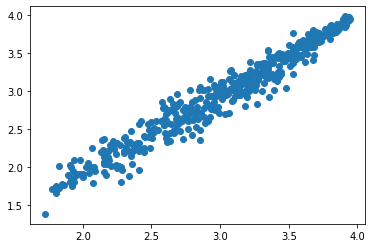

In [645]:
plt.scatter(reg2.predict(X_train_h), y_train_h, label='Training data')

In [646]:
print([first_second_year_grades_encoded_h.iloc[1]])


[PH-121        2
HS-101       11
CY-105       10
HS-105/12    11
MT-111        6
CS-105        8
CS-106       11
EL-102        2
EE-119       10
ME-107       11
CS-107        4
HS-205/20     7
MT-222        6
EE-222        9
MT-224       10
CS-210       10
CS-211       11
CS-203        8
CS-214       11
EE-217        6
CS-212        8
CS-215       11
Name: 1, dtype: int32]


In [647]:
# reg2.predict([[2, 11, 10, 11, 6, 8, 11, 2, 10, 11, 4, 7, 6, 9, 10, 10, 11, 8, 11, 6, 8, 11]]) # actuall value was 2.008 , 2.2626 - 2.008 = 0.255
# reg2.predict([[6 ,10 ,9 ,8 ,9 ,10 ,11 ,9 ,6 ,9 ,9 ,4 ,11 ,3 ,6 ,7 ,10 ,10 ,11 ,2 ,11 ,9]])

In [648]:
##############################################################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################################################
##############################################################################################################################################################################################################################################################################################################

In [649]:
third_second_first_year = df.iloc[:,0:29]

In [650]:
third_second_first_year

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,D,A,D,C-,C,C-,C+,B,C,C+
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D,B-,C,D,D+,D,C-,A-,D+,C-
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,A-,A,A-,A,A,C+,A,B+,A-,B
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D,D+,D,D,D+,D,B-,D,B-,D+
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,A-,A,A-,A-,C+,C-,A-,B-,A-,C+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A,A,B,A-,A,B,A-,A-,A,A+
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,A+,A,A,B,A,A,A,A,A,A
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,B,A,B+,B,A,B,B-,B+,B+,A
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,C,B-,D+,D+,C+,D,C,C,C+,C-


In [651]:
third_second_first_year.drop(['Seat No.'],axis=1,inplace=True)

In [652]:
third_second_first_year = pd.concat([third_second_first_year, df.CGPA], axis=1)

In [653]:
print(third_second_first_year.isna().any())

PH-121       False
HS-101       False
CY-105        True
HS-105/12     True
MT-111        True
CS-105       False
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20     True
MT-222        True
EE-222        True
MT-224        True
CS-210        True
CS-211        True
CS-203        True
CS-214        True
EE-217        True
CS-212        True
CS-215        True
MT-331        True
EF-303        True
HS-304        True
CS-301        True
CS-302        True
TC-383        True
CGPA         False
dtype: bool


In [654]:
third_second_first_year.dropna(inplace=True)

In [655]:
print(third_second_first_year.isna().any())

PH-121       False
HS-101       False
CY-105       False
HS-105/12    False
MT-111       False
CS-105       False
CS-106       False
EL-102       False
EE-119       False
ME-107       False
CS-107       False
HS-205/20    False
MT-222       False
EE-222       False
MT-224       False
CS-210       False
CS-211       False
CS-203       False
CS-214       False
EE-217       False
CS-212       False
CS-215       False
MT-331       False
EF-303       False
HS-304       False
CS-301       False
CS-302       False
TC-383       False
CGPA         False
dtype: bool


In [656]:
third_second_first_year

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,A,D,C-,C,C-,C+,B,C,C+,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,B-,C,D,D+,D,C-,A-,D+,C-,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A,A-,A,A,C+,A,B+,A-,B,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,D,D,D+,D,B-,D,B-,D+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A,A-,A-,C+,C-,A-,B-,A-,C+,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A,B,A-,A,B,A-,A-,A,A+,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,A,A,B,A,A,A,A,A,A,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A,B+,B,A,B,B-,B+,B+,A,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,B-,D+,D+,C+,D,C,C,C+,C-,2.193


In [657]:
target3 = third_second_first_year.CGPA

In [658]:
third_second_first_year.drop(['CGPA'],axis = 1 , inplace = True)

In [659]:
dicitonary3_h = []

# dictionary within list
# we are mapping grades to numbers 

for i in third_second_first_year:    
    dicitonary3_h.append({'col': str(i), 'mapping':{'A+': 1, 'A': 2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8, 'C-': 9, 'D+': 10, 'D': 11, 'D-': 12, 'F': 13, 'P': 14, 'W': 15, 'WU': 16}})

#instantiate the encoder
for j in third_second_first_year:    
    column_names_h = str(j)
    encoder = ce.OrdinalEncoder(cols=[column_names_h], mapping=dicitonary3_h)
    third_second_first_year_encoded = encoder.fit_transform(third_second_first_year)

    print(third_second_first_year_encoded)

     PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0         6      10       9          8       9      10      11       9   
1         2      11      10         11       6       8      11       2   
2         2       5       2          6       4       2       6       4   
3        11       7      10         11      11       3      10       9   
4         3       3       3          4       2       2       3       4   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566       5       2       2          3       1       2       3       3   
567       1       2       2          2       2       2       2       3   
568       5       2       3          4       2       2       2       2   
569       2       4      11          2      11      10       6       9   
570       8      11      11          8       8      10       5       7   

     EE-119  ME-107  ...  CS-214  EE-217  CS-212  CS-215  MT-331  EF-303  \
0         6       9  ...      11   

In [660]:
third_second_first_year_encoded

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383
0,6,10,9,8,9,10,11,9,6,9,...,11,2,11,9,8,9,7,5,8,7
1,2,11,10,11,6,8,11,2,10,11,...,11,6,8,11,10,11,9,3,10,9
2,2,5,2,6,4,2,6,4,3,3,...,3,2,3,2,2,7,2,4,3,5
3,11,7,10,11,11,3,10,9,11,7,...,11,10,11,11,10,11,6,11,6,10
4,3,3,3,4,2,2,3,4,2,3,...,3,2,3,3,7,9,3,6,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,5,2,2,3,1,2,3,3,1,4,...,2,2,5,3,2,5,3,3,2,1
567,1,2,2,2,2,2,2,3,2,2,...,1,2,2,5,2,2,2,2,2,2
568,5,2,3,4,2,2,2,2,2,5,...,5,2,4,5,2,5,6,4,4,2
569,2,4,11,2,11,10,6,9,6,9,...,8,6,10,10,7,11,8,8,7,9


In [661]:
print(target3)

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 561, dtype: float64


In [662]:
# Linear Regression 

X_train_h , X_test_h , y_train_h , y_test_h = train_test_split(third_second_first_year_encoded , target3 , test_size=0.2 , random_state=42) # test_size is the percentage of data to be used for testing

In [663]:

lr_h3 = LinearRegression()

In [664]:
lr_h3.fit(X_train_h , y_train_h)

LinearRegression()

In [666]:
print("Training set score: {:.2f} %".format(lr_h3.score(X_train_h , y_train_h)*100))

Training set score: 98.32 %


In [667]:
print("Testing set score: {:.2f} %".format(lr_h3.score(X_test_h , y_test_h)*100))

Testing set score: 96.68 %


In [668]:
#kNN Regression

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(third_second_first_year_encoded, target3, test_size=0.2, random_state=42)

In [669]:
reg3 = KNeighborsRegressor()

In [670]:
reg3.fit(X_train_h , y_train_h)

KNeighborsRegressor()

In [671]:
print("Training Data set score: {:.2f} %".format(reg3.score(X_train_h , y_train_h)*100))

Training Data set score: 96.56 %


In [672]:
print("Testing Data set score: {:.2f} %".format(reg3.score(X_test_h , y_test_h)*100))

Testing Data set score: 92.53 %
